In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
tetra=np.pi-np.arccos(1/3)
A=-np.array([8,6,37.3])/10000*sl.Tools.NucInfo('e')

ex=[]
ex.append(sl.ExpSys(B0=-9e9/sl.Tools.NucInfo('e'),Nucs=['e','14N'],LF=[False,True],vr=0,pwdavg=sl.PowderAvg(q=4)))
ex[-1].set_inter('g',i=0,gxx=2.0093,gyy=2.0062,gzz=2.0022)
ex[-1].set_inter('hyperfine',i0=0,i1=1,Axx=A[0],Ayy=A[1],Azz=A[2])

for k in range(3):
    ex.append(ex[0].copy())
    ex[-1].set_inter('g',i=0,gxx=2.0093,gyy=2.0062,gzz=2.0022,euler=[0,tetra,k*2*np.pi/3])
    ex[-1].set_inter('hyperfine',i0=0,i1=1,Axx=A[0],Ayy=A[1],Azz=A[2],
                    euler=[0,tetra,k*2*np.pi/3])

In [4]:
L=sl.Liouvillian(ex)
L.kex=sl.Tools.fourSite_sym(tc=1e-8)

seq=L.Sequence().add_channel('e',v1=0,t=2e-9,voff=-50e6)

In [5]:
rho=sl.Rho(rho0='e-x',detect='e-p')
rho.DetProp(seq,n=150)

State-space reduction: 144->36


Density Matrix/Detection Operator
rho0: e-x
detect[0]: e-p
Current time is 0.300 microseconds
150 time points have been recorded


<IPython.core.display.Javascript object>


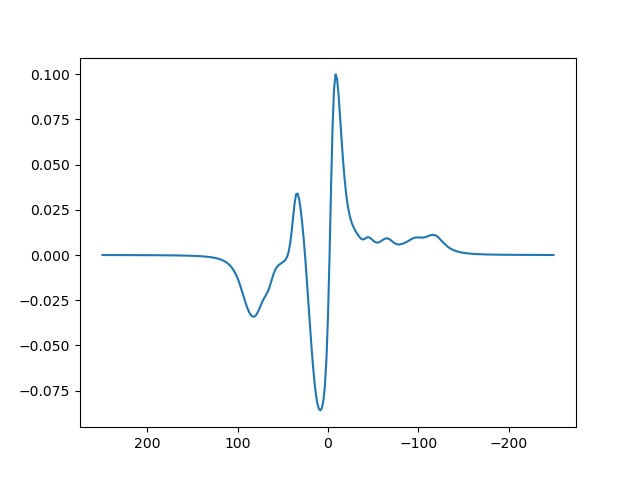

In [6]:
I=rho.I[0]
I[0]/=2
I*=np.exp(-rho.t_axis/rho.t_axis[-1]*5)
FT=np.fft.fftshift(np.fft.fft(I,2*len(I)))

ax=plt.subplots()[1]
ax.plot(rho.v_axis[1:]/1e6,np.diff(FT).real)
ax.xaxis.set_inverted(True)

<IPython.core.display.Javascript object>


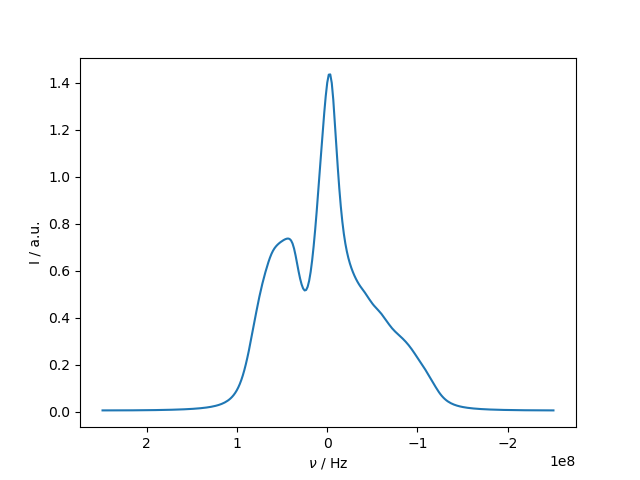

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [59]:
rho.plot(FT=True,apodize=True)